In [1]:
# first let's capture the data
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('weatherAUS.csv')
data['Date'] = pd.to_datetime(data["Date"])
data = data.dropna()
data = data.sort_values(by='Date')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


In [19]:
# format the data
df = pd.get_dummies(data,columns=['Location','WindGustDir','WindDir9am','WindDir3pm'])
# convert yes's -> 1's, and no's -> 0's
df = df.replace(to_replace=['Yes', 'No'], value=[1,0])
# remove columns Date & RainTomorrow. Date might not be relevant. RainTomorrow is the Y variable.
columns = df.columns.values.tolist()
columns.remove('Date')
columns.remove('RainTomorrow')
# assign X & Y's
X = df[columns]
Y = df['RainTomorrow']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
# check uniform shape of data
print(f'X_train: {X_train.shape}, Y_train: {Y_train.shape}')
print(f'X_test: {X_test.shape}, Y_test: {Y_test.shape}')

X_train: (45136, 91), Y_train: (45136,)
X_test: (11284, 91), Y_test: (11284,)


In [20]:
# feed the classifier neural network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20), verbose=1)
chistory = mlpc.fit(X_train, Y_train)
yc_prediction = mlpc.predict(X_test)
mlpc_accuracy = accuracy_score(Y_test, yc_prediction)
print(f'MLPC Accuracy: {mlpc_accuracy}')

MLPC Accuracy: 0.8581176887628501


/Users/michaelcordero/anaconda3/envs/cap-5602-final-project-group-5/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [4]:
# feed the regressor neural network
from sklearn.neural_network import MLPRegressor
import numpy as np

mlpr = MLPRegressor(hidden_layer_sizes=(20, 20, 20), solver='adam', activation='logistic', verbose=1)
rhistory = mlpr.fit(X_train, Y_train)
yr_prediction: np.ndarray = mlpr.predict(X_test)
yrm_prediction = np.array(list(map(lambda y: 1 if y >= 0.5 else 0, yr_prediction)))
mlpr_accuracy = accuracy_score(Y_test, yrm_prediction)
print(f'MLPR Accuracy: {mlpr_accuracy}')

MLPR Accuracy: 0.8582949308755761


In [5]:
# mlp with keras
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

mlpk = Sequential()
mlpk.add(Dense(20, activation='relu'))
mlpk.add(Dense(1, activation='sigmoid'))

# compile and train model
mlpk.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='sgd', metrics=['accuracy'])
mlpk.fit(X_train, Y_train, epochs=10)
# evaluate the model
mlpk_loss, mlpk_accuracy = mlpk.evaluate(X_test, Y_test)
print(f'MLPK accuracy: {mlpk_accuracy}')

Epoch 1/10
 160/1411 [==>...........................] - ETA: 0s - loss: 16.1766 - accuracy: 0.7693  

2023-07-16 22:23:05.238840: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1411/1411 [==============================] - 0s 249us/step - loss: 2.3138 - accuracy: 0.7808
Epoch 2/10
1411/1411 [==============================] - 0s 233us/step - loss: 0.5255 - accuracy: 0.7812
Epoch 3/10
1411/1411 [==============================] - 0s 231us/step - loss: 0.5254 - accuracy: 0.7812
Epoch 4/10
1411/1411 [==============================] - 0s 231us/step - loss: 0.5254 - accuracy: 0.7812
Epoch 5/10
1411/1411 [==============================] - 0s 237us/step - loss: 0.5254 - accuracy: 0.7812
Epoch 6/10
1411/1411 [==============================] - 0s 247us/step - loss: 0.5254 - accuracy: 0.7812
Epoch 7/10
1411/1411 [==============================] - 0s 239us/step - loss: 0.5254 - accuracy: 0.7812
Epoch 8/10
1411/1411 [==============================] - 0s 241us/step - loss: 0.5254 - accuracy: 0.7812
Epoch 9/10
1411/1411 [==============================] - 0s 236us/step - loss: 0.5254 - accuracy: 0.7812
Epoch 10/10
353/353 [==============================] - 0s 254us/step - loss

<Axes: xlabel='Importance', ylabel='Feature'>

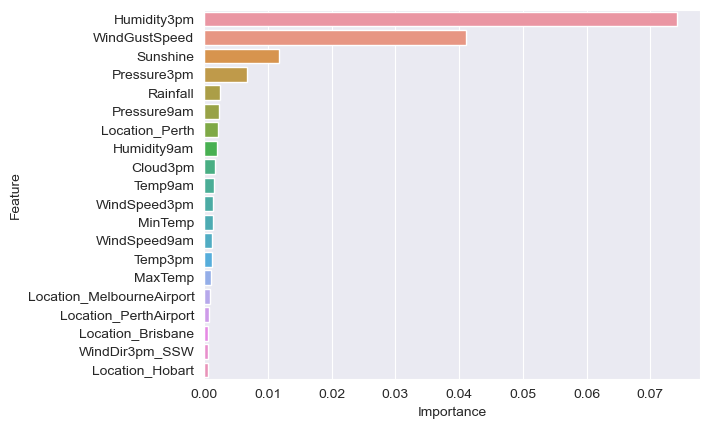

In [17]:
# feature importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.inspection import permutation_importance


# plt.use('MacOSX')
# plt.interactive(True)
result = permutation_importance(mlpc, X_train, Y_train, n_repeats=10, random_state=42) # only mlpc & mlpr compatible
feature_importances = result.importances_mean
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
sb.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.show()

<Axes: >

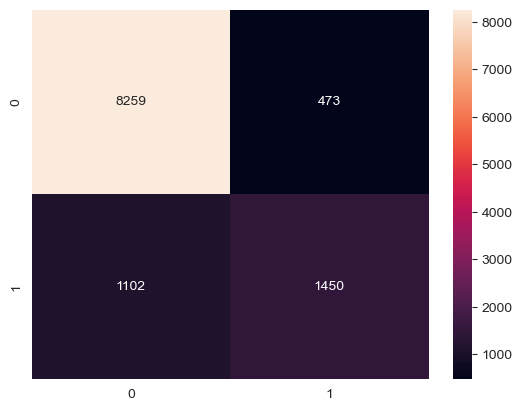

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sb

conf_matrix = confusion_matrix(Y_test, yc_prediction)
sb.heatmap(conf_matrix, annot=True, fmt="d")
plt.show()